In [1]:
#import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm
from pmdarima.arima import auto_arima


In [30]:
#reading and visualizing the dataset
df = pd.read_csv("tracks.csv", header=0)
df

,Timestamp,x,y
0,674.9,524.786665,379.791013
1,675.0,524.944365,379.719013
2,675.1,525.086665,379.644013
3,675.2,525.228965,379.569013
4,675.3,525.371165,379.494013
...,...,...,...
193,694.2,542.438765,361.328013
194,694.3,542.531565,361.317013
195,694.4,542.631565,361.310013
196,694.5,542.738265,361.303013


In [3]:
df = df.set_index('Timestamp')
df

,x,y
Timestamp,,
674.9,524.786665,379.791013
675.0,524.944365,379.719013
675.1,525.086665,379.644013
675.2,525.228965,379.569013
675.3,525.371165,379.494013
...,...,...
694.2,542.438765,361.328013
694.3,542.531565,361.317013
694.4,542.631565,361.310013


In [31]:
#splitting the dataset df into df1 and df2 for forecasting on x and y separately
df1 = pd.DataFrame(data=df['x'])
df2 = pd.DataFrame(data=df['y'])
print(df1)
print(df2)

              x
0    524.786665
1    524.944365
2    525.086665
3    525.228965
4    525.371165
..          ...
193  542.438765
194  542.531565
195  542.631565
196  542.738265
197  542.835965

[198 rows x 1 columns]
              y
0    379.791013
1    379.719013
2    379.644013
3    379.569013
4    379.494013
..          ...
193  361.328013
194  361.317013
195  361.310013
196  361.303013
197  361.301013

[198 rows x 1 columns]


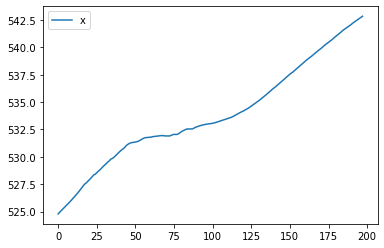

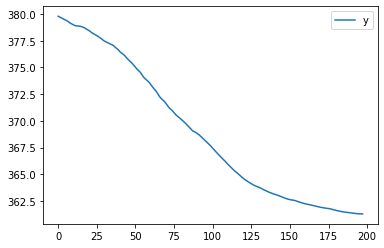

In [32]:
#plotting x and y versus time
df1.plot()
df2.plot()

plt.show()

In [33]:
#importing ADFTest for executing Augmented Dickey Fuller test for stationarity
from pmdarima.arima import ADFTest
adf_test1 = ADFTest(alpha = 0.05)
adf_test1.should_diff(df1)
print(adf_test1.should_diff(df1))
adf_test2 = ADFTest(alpha = 0.05)
print(adf_test2.should_diff(df2))

(0.47943632264774805, True)
(0.9840307886081358, True)


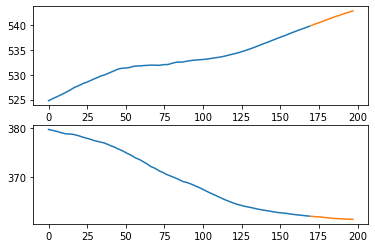

In [34]:
#splitting df1 and df2 into training and testing sets and plotting

train_x = df1[:170]
test_x = df1[-28:]
train_y = df2[:170]
test_y = df2[-28:]

f, (ax,ay) = plt.subplots(nrows=2, ncols=1, sharey=False)
ax.plot(train_x)
ax.plot(test_x)
ay.plot(train_y)
ay.plot(test_y)


In [21]:
train_x_diff = train_x.diff()
train_x_diff.dropna(inplace = True)
train_y_diff = train_y.diff()
train_y_diff.dropna(inplace = True)


In [35]:
train_x_diff = train_x
train_y_diff = train_y

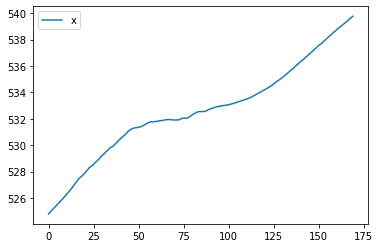

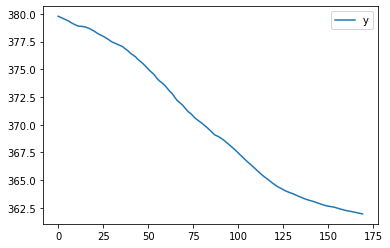

In [36]:
train_x_diff.plot()
train_y_diff.plot()
plt.show()


In [37]:
adf_test = ADFTest(alpha = 0.05)
print(adf_test.should_diff(train_x_diff))
print(adf_test.should_diff(train_y_diff))

(0.4379513156490543, True)
(0.9341943471458665, True)


In [38]:
#calling auto arima for x
arima_model_x = auto_arima(train_x,
                           seasonal=False,
                           trace=True,
                           test='adf',
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-782.979, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-789.693, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-792.120, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-793.658, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-791.662, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-800.810, Time=0.14 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-802.038, Time=0.22 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-792.002, Time=0.03 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-802.342, Time=0.24 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=-793.823, Time=0.03 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=-802.127, Time=0.29 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-801.577, Time=0.25 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=-800.071, Time=0.12 sec
 ARIMA(4,2,2)(0,0,0)[0] intercept   : AIC=-799.889, Time=0.34 sec
 ARIMA(3,2,1)(0,0,0)[0]          

In [39]:
#calling auto arima for y
arima_model_y = auto_arima(train_y,
                           seasonal=False,
                           trace=True,
                           test='adf',
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-854.820, Time=0.23 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-818.402, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-818.512, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-822.578, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-820.384, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-847.783, Time=0.11 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-856.757, Time=0.18 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-827.012, Time=0.23 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-849.316, Time=0.06 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-855.020, Time=0.10 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=-857.023, Time=0.07 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=-855.028, Time=0.05 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=-853.027, Time=0.06 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=-858.963, Time=0.05 sec
 ARIMA(2,2,0)(0,0,0)[0]          

In [40]:
#formatting obtained predictions into dataframe
prediction_x = pd.DataFrame(arima_model_x.predict(n_periods=28),index=test_x.index)
prediction_x.columns = ['predicted_x']
print(prediction_x)
prediction_y = pd.DataFrame(arima_model_y.predict(n_periods=28),index=test_y.index)
prediction_y.columns = ['predicted_y']
print(prediction_y)

     predicted_x
170   539.871131
171   539.980608
172   540.094338
173   540.205973
174   540.317202
175   540.430412
176   540.541948
177   540.652903
178   540.765664
179   540.877473
180   540.988549
181   541.101031
182   541.213004
183   541.324199
184   541.436448
185   541.548505
186   541.659827
187   541.771903
188   541.883992
189   541.995434
190   542.107386
191   542.219473
192   542.331022
193   542.442889
194   542.554955
195   542.666592
196   542.778407
197   542.890440
     predicted_y
170   361.904404
171   361.867857
172   361.832708
173   361.797617
174   361.761736
175   361.725453
176   361.689437
177   361.653780
178   361.618137
179   361.582294
180   361.546347
181   361.510468
182   361.474681
183   361.438897
184   361.403062
185   361.367201
186   361.331357
187   361.295537
188   361.259718
189   361.223885
190   361.188046
191   361.152211
192   361.116382
193   361.080554
194   361.044722
195   361.008888
196   360.973056
197   360.937225


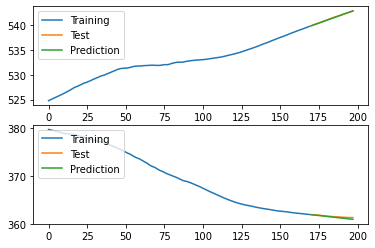

In [41]:
#plotting test set and prediction for a visual comparison
f, (ax,ay) = plt.subplots(nrows=2, ncols=1, sharey=False)

ax.plot(train_x, label='Training')
ax.plot(test_x, label='Test')
ax.plot(prediction_x, label='Prediction')
ax.legend(loc ='upper left')
ay.plot(train_y, label='Training')
ay.plot(test_y, label='Test')
ay.plot(prediction_y, label='Prediction')
ay.legend(loc ='upper left')

In [37]:
#arima_model_x.summary()

In [38]:
#arima_model_y.summary()

In [42]:
#evaluating our forecast computing the coefficient of determination r2 and the mean absolute percentage error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

print("Coefficient of determination for x is : " + str(r2_score(test_y['y'], prediction_y)))
print("Coefficient of determination for y is : " + str(r2_score(test_x['x'], prediction_x)))

print("MAPE for x is : " + str(mean_absolute_percentage_error(test_x['x'], prediction_x)))
print("MAPE for y is : " + str(mean_absolute_percentage_error(test_y['y'], prediction_y)))


Coefficient of determination for x is : 0.2895087054891716
Coefficient of determination for y is : 0.9981477010932065
MAPE for x is : 6.24287046967676e-05
MAPE for y is : 0.00038898975888219603
